# TASK-1: UNEMPLOYMENT IN INDIA

#### IMPORTING LIBRARIES

In [178]:
import pandas as pd
import numpy as np

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

#### READING DATA

In [180]:
un_df = pd.read_csv('cognoriseDatasets\\Unemployment in India.csv')
un_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [181]:
un_df.shape

(768, 7)

In [182]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [183]:
un_df = un_df.dropna()

In [184]:
un_df[" Date"] = pd.to_datetime(un_df[" Date"],dayfirst=True)

#### LOADING DATA

In [185]:
r_df = pd.read_csv("cognoriseDatasets\\Unemployment_Rate_upto_11_2020.csv")
r_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [186]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [187]:
r_df[" Date"] = pd.to_datetime(r_df[" Date"],dayfirst=True)

In [188]:
r_df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

#### MERGING TWO TABLES

In [189]:
merged_df = pd.merge(un_df, r_df[['Region',"Region.1",'longitude', 'latitude']], on=['Region'],how='left')
merged_df = merged_df.drop_duplicates().reset_index(drop=True)
merged_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74


In [190]:
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace("(%)","")
df.columns = df.columns.str.lower()

In [191]:
df.columns

Index(['region', '_date', '_frequency', '_estimated_unemployment_rate_',
       '_estimated_employed', '_estimated_labour_participation_rate_', 'area',
       'region.1', 'longitude', 'latitude', 'year', 'estimated_employed_rate'],
      dtype='object')

#### CREATING NEW COLUMN ESTIMATED EMPLOYED RATE

In [192]:
df['estimated_employed_rate'] = 100 - df['_estimated_unemployment_rate_'] - df["_estimated_labour_participation_rate_"]
df.head()

,region,_date,_frequency,_estimated_unemployment_rate_,_estimated_employed,_estimated_labour_participation_rate_,area,region.1,longitude,latitude,year,estimated_employed_rate
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,South,15.9129,79.74,2019,53.11
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,South,15.9129,79.74,2019,54.90
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,South,15.9129,79.74,2019,52.75
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,South,15.9129,79.74,2019,52.71
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,South,15.9129,79.74,2019,50.15


In [193]:
num_df = df.select_dtypes(include=["float","int"])

In [194]:
num_df.columns

Index(['_estimated_unemployment_rate_', '_estimated_employed',
       '_estimated_labour_participation_rate_', 'longitude', 'latitude',
       'year', 'estimated_employed_rate'],
      dtype='object')

In [195]:
num_df.describe()

,_estimated_unemployment_rate_,_estimated_employed,_estimated_labour_participation_rate_,longitude,latitude,year,estimated_employed_rate
count,1007.000000,1.007000e+03,1007.000000,995.000000,995.000000,1007.000000,1007.000000
mean,11.906991,8.996209e+06,42.378620,22.789695,80.498733,2019.572989,45.714389
std,10.739549,1.020784e+07,8.048542,6.229697,5.794345,0.494890,13.303438
min,0.000000,4.942000e+04,13.330000,10.850500,71.192400,2019.000000,-21.300000
25%,4.685000,1.639125e+06,37.835000,18.112400,76.085600,2019.000000,40.750000
50%,8.890000,5.543380e+06,40.880000,23.610200,79.019300,2020.000000,47.720000
75%,16.125000,1.287115e+07,45.315000,27.023800,85.279900,2020.000000,54.570000
max,76.740000,5.943376e+07,72.570000,33.778200,92.937600,2020.000000,79.440000


In [196]:
df["year"] = df["_date"].dt.year

#### RELATIONSIHP AMONG NUMERICAL FEATURES

<Axes: >

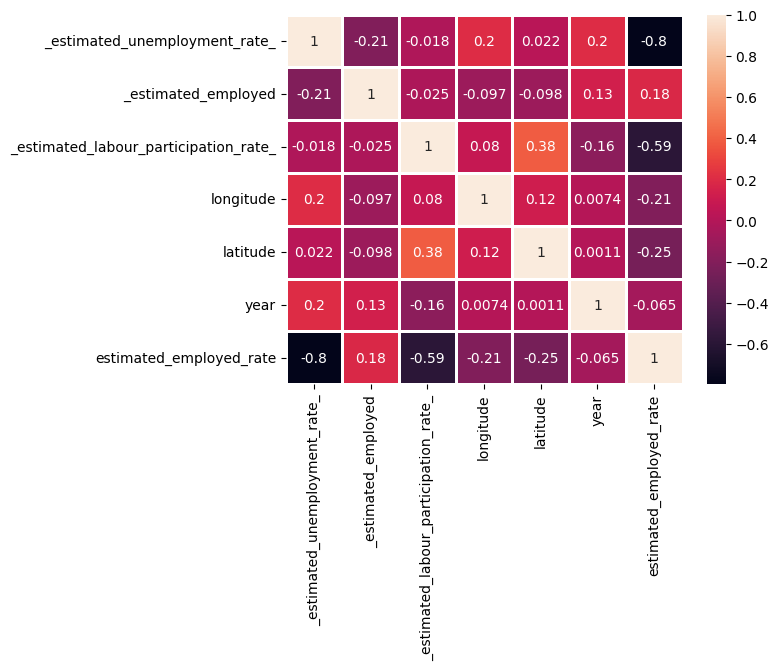

In [197]:
sns.heatmap(num_df.corr(), annot=True, linewidths=0.8)

#### RELATIONSHIP BETWEEN CARDINAL DIRECTION AND UNEMPLOYMENT RATE

<Axes: xlabel='region.1', ylabel='_estimated_unemployment_rate_'>

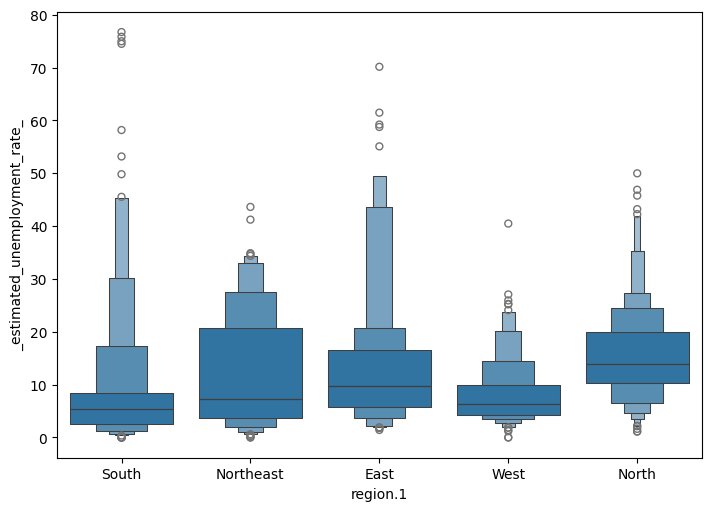

In [198]:
fig=plt.figure(figsize=(7,5),layout = "constrained")
sns.boxenplot(data=df, x='region.1', y='_estimated_unemployment_rate_')

#### YEAR WISE UNEMPLOYMENT RATE AND EMPLOYMENT RATE BY AREA

<Axes: xlabel='year', ylabel='estimated_employed_rate'>

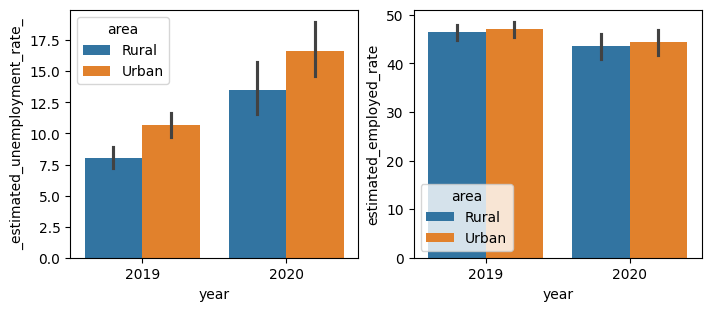

In [199]:
fig,axs = plt.subplots(1,2, figsize=(7,3), constrained_layout=True)
sns.barplot(data=df,x="year",y="_estimated_unemployment_rate_",hue="area",ax=axs[0])
sns.barplot(data=df,x="year",y="estimated_employed_rate",hue="area",ax=axs[1])

#### UNEMPLOYEMENT RATE  AND LABOUR PARTICIPATION RATE BASED ON CARDINAL DIRECTION YEAR WISE

<Axes: xlabel='year', ylabel='_estimated_labour_participation_rate_'>

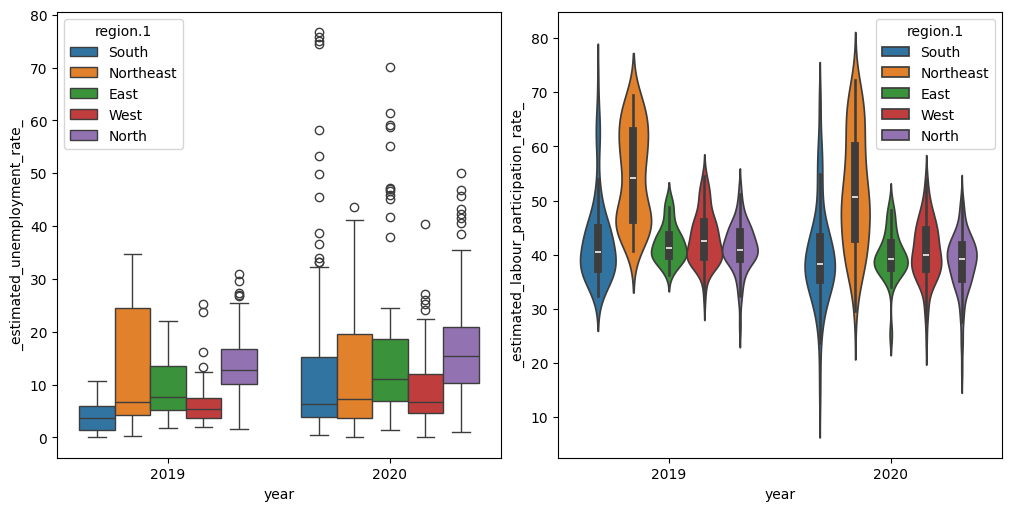

In [200]:
fig,axs = plt.subplots(1,2,figsize=(10,5),layout="constrained")
sns.boxplot(data=df,x="year",y="_estimated_unemployment_rate_",hue="region.1",ax=axs[0])
sns.violinplot(data=df,x="year",y="_estimated_labour_participation_rate_",hue="region.1",ax=axs[1])

#### DISTRIBUTION OF REGIONS

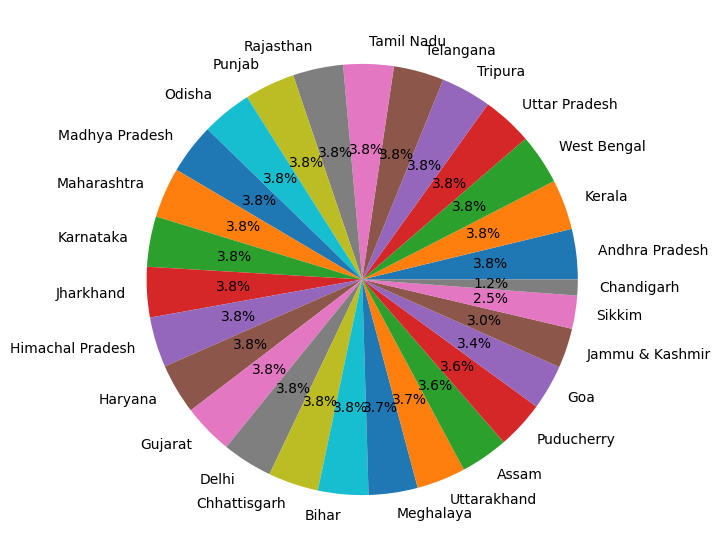

In [202]:
fig=plt.figure(figsize=(9,7))
plt.pie(df["region"].value_counts(normalize = True).values,labels = df["region"].value_counts(normalize = True).index,autopct='%1.1f%%')
plt.show()

#### PARTICIPATION OF LABOUR BY UNEMPLOYMENT AND EMPLOYED

<Axes: xlabel='estimated_employed_rate', ylabel='_estimated_labour_participation_rate_'>

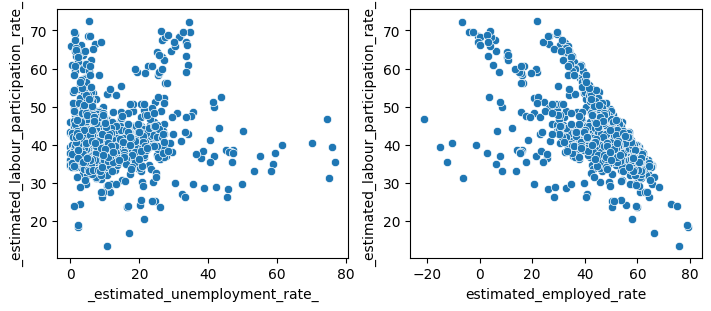

In [203]:
fig,axs=plt.subplots(1,2,figsize=(7,3),layout="constrained")
sns.scatterplot(data=df,x="_estimated_unemployment_rate_",y="_estimated_labour_participation_rate_",ax=axs[0])
sns.scatterplot(data=df,x="estimated_employed_rate",y="_estimated_labour_participation_rate_",ax=axs[1])

#### RELATIONSHIP BETWEEN LABOUR RATE AND YEAR, UNEMPLOYMENT RATE AND YEAR

<Axes: xlabel='year', ylabel='_estimated_unemployment_rate_'>

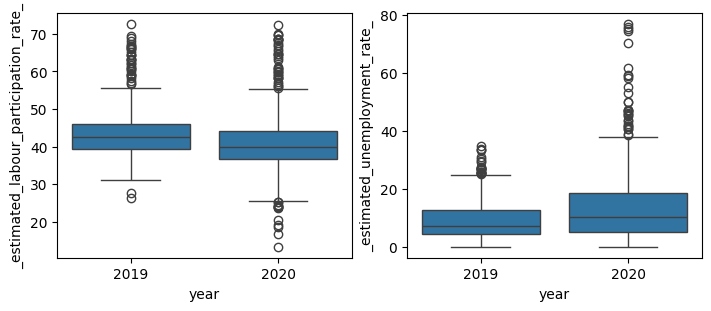

In [205]:
fig,axs=plt.subplots(1,2,figsize=(7,3),layout="constrained")
sns.boxplot(data=df,x="year",y="_estimated_labour_participation_rate_",ax=axs[0])
sns.boxplot(data=df,x="year",y="_estimated_unemployment_rate_",ax=axs[1])

#### TOP AVERAGE REGION ON UNEMPLOYMENT RATE, EMPLOYED RATE, LABOUR RATE BASED

In [206]:
grp=df.groupby("region")[["_estimated_unemployment_rate_","estimated_employed_rate","_estimated_labour_participation_rate_"]].mean()

In [207]:
grp.loc[grp["_estimated_unemployment_rate_"]==grp["_estimated_unemployment_rate_"].max(),["_estimated_unemployment_rate_"]]

,_estimated_unemployment_rate_
region,
Tripura,27.483158


In [208]:
grp.loc[grp["estimated_employed_rate"]==grp["estimated_employed_rate"].max(),["estimated_employed_rate"]]

,estimated_employed_rate
region,
Uttarakhand,58.004595


In [209]:
grp.loc[grp["_estimated_labour_participation_rate_"]==grp["_estimated_labour_participation_rate_"].max(),["_estimated_labour_participation_rate_"]]

,_estimated_labour_participation_rate_
region,
Tripura,60.777632


#### UNEMPLOYED RATE Vs EMPLOYED RATE

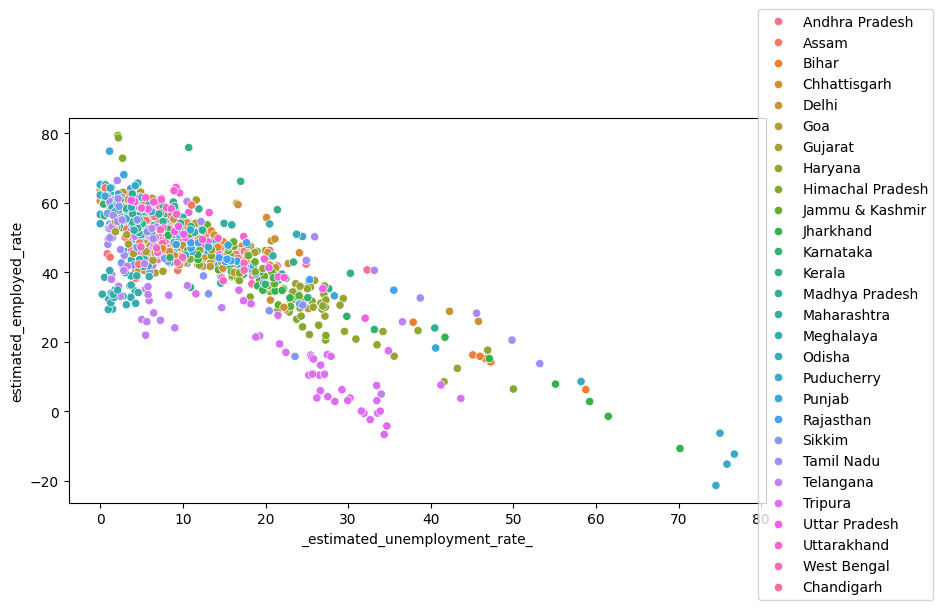

In [210]:
fig=plt.figure(figsize=(9,5))
sns.scatterplot(data=df,x="_estimated_unemployment_rate_",y="estimated_employed_rate",hue="region")
plt.legend(loc="best",bbox_to_anchor=(1.25,1.3))

#### HIGHEST RATE

In [216]:
df[["_estimated_unemployment_rate_","estimated_employed_rate","_estimated_labour_participation_rate_"]].max()

_estimated_unemployment_rate_            76.74
estimated_employed_rate                  79.44
_estimated_labour_participation_rate_    72.57
dtype: float64